In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install vaderSentiment

In [ ]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # This line imports SentimentIntensityAnalyzer after vaderSentiment is installed.

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # This line imports SentimentIntensityAnalyzer after vaderSentiment is installed.
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from itertools import chain
from wordcloud import WordCloud
from datetime import datetime

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the punkt_tab data package.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# prompt: read this file /content/drive/MyDrive/youtube_main_comments_with_time11.xlsx

excel_file_path = '/content/drive/MyDrive/youtube_main_comments_with_time11.xlsx'
df = pd.read_excel(excel_file_path)

In [ ]:
# Drop missing comments
df = df.dropna(subset=['Comment']).reset_index(drop=True)

In [ ]:
# prompt: drop missing comments and dates

# Convert 'Time' column to datetime objects, handling potential errors
df['Time'] = pd.to_datetime(df['Published Time'], errors='coerce')

# Drop rows with missing or invalid 'Time' values after conversion
df = df.dropna(subset=['Time']).reset_index(drop=True)

print(f"DataFrame after dropping rows with missing comments and dates:")
print(df.head())

DataFrame after dropping rows with missing comments and dates:
      Video ID                                            Comment  \
0  7ToBt0KWJw8  The best way to deal with scammers is to avoid...   
1  7ToBt0KWJw8                      You talk too much.gets boring   
2  7ToBt0KWJw8  Well said, so funny and scary with that scamme...   
3  7ToBt0KWJw8                        මොහු නිතිය හමුවට පමුණවා ඇත.   
4  7ToBt0KWJw8  Luckily we have camaras to avoid this hypocrit...   

       Published Time                Time  
0 2025-03-24 20:16:29 2025-03-24 20:16:29  
1 2025-03-10 12:34:41 2025-03-10 12:34:41  
2 2025-03-09 20:54:10 2025-03-09 20:54:10  
3 2025-03-09 13:45:13 2025-03-09 13:45:13  
4 2025-03-04 20:43:06 2025-03-04 20:43:06  


In [ ]:

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using TextBlob
def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Function to classify sentiment using VADER
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


#Apply sentiment analysis
df["Sentiment_TextBlob"] = df["Comment"].apply(get_sentiment_textblob)
df["Sentiment_VADER"] = df["Comment"].apply(get_sentiment_vader)


# Display first few results
print(df[['Comment', 'Sentiment_TextBlob', 'Sentiment_VADER']].head(10))
df = df.dropna(subset=['Comment']).reset_index(drop=True)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using TextBlob
def get_sentiment_textblob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Function to classify sentiment using VADER
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment_TextBlob"] = df["Comment"].apply(get_sentiment_textblob)
df["Sentiment_VADER"] = df["Comment"].apply(get_sentiment_vader)



                                             Comment Sentiment_TextBlob  \
0  The best way to deal with scammers is to avoid...           Positive   
1                      You talk too much.gets boring           Negative   
2  Well said, so funny and scary with that scamme...           Negative   
3                        මොහු නිතිය හමුවට පමුණවා ඇත.            Neutral   
4  Luckily we have camaras to avoid this hypocrit...           Positive   
5  Brother protect your stufs from scamers they s...            Neutral   
6   Who visit srilanka 😂😂you are  such a stupid dale           Negative   
7  Your annoying, not him...stop talking to him, ...           Negative   
8                                         😂😂😂😂😂😂😂😂😂😂            Neutral   
9  “Free ice cream”\n“Really hot girls”\n“Retro N...           Positive   

  Sentiment_VADER  
0        Positive  
1        Negative  
2        Negative  
3         Neutral  
4        Negative  
5        Positive  
6        Negative  
7        Negat

Column names: Index(['Video ID', 'Comment', 'Published Time', 'Sentiment_TextBlob',
       'Sentiment_VADER'],
      dtype='object')
Dataset shape: (110338, 5)
Top 20 most common words: [('sri', 22562), ('lanka', 14533), ('people', 13150), ('like', 10793), ('country', 10013), ('guy', 9097), ('sorry', 7993), ('man', 7843), ('u', 7741), ('video', 7701), ('good', 6789), ('yes', 6770), ('lankan', 5895), ('go', 5468), ('love', 5247), ('really', 5118), ('bro', 4688), ('get', 4656), ('one', 4512), ('time', 4045)]


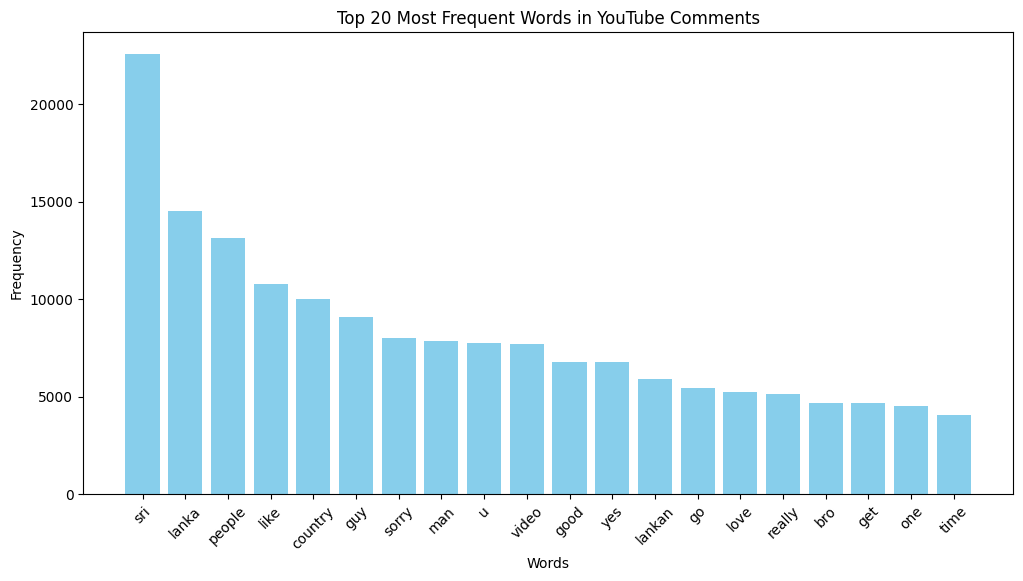

In [ ]:
#Top 20 Most Frequent Words in YouTube Comments

# Ensure column names are stripped of spaces
df.columns = df.columns.str.strip()

# Display dataset info
print("Column names:", df.columns)
print("Dataset shape:", df.shape)

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenize words
        tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
        return " ".join(tokens)
    return ""

# Apply text cleaning to comments
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# Function to compute word frequency
def word_frequency(text):
    words = word_tokenize(text)
    return Counter(words)

# Get word frequency from all comments
all_words = ' '.join(df['Cleaned_Comment'])
word_counts = word_frequency(all_words)

# Print top 20 most common words
print("Top 20 most common words:", word_counts.most_common(20))

# Visualization of top 20 words
top_words = word_counts.most_common(20)
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in YouTube Comments')
plt.xticks(rotation=45)
plt.show()

                                             Comment  Sentiment_Polarity  \
0  The best way to deal with scammers is to avoid...            1.000000   
1                      You talk too much.gets boring           -1.000000   
2  Well said, so funny and scary with that scamme...           -0.250000   
3                        මොහු නිතිය හමුවට පමුණවා ඇත.            0.000000   
4  Luckily we have camaras to avoid this hypocrit...            0.333333   

  Sentiment_Category  
0           Positive  
1           Negative  
2           Negative  
3            Neutral  
4           Positive  


<ipython-input-57-45a75a6704fe>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Category', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])


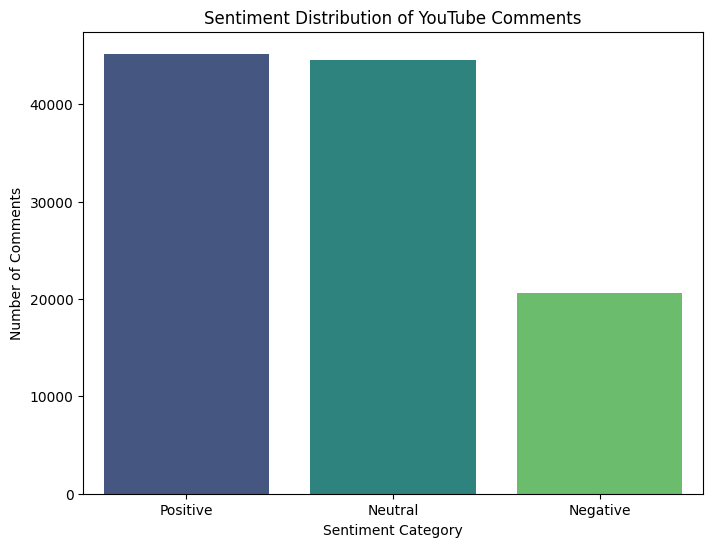

In [ ]:


# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns sentiment polarity (-1 to 1)

# Apply sentiment analysis to the "Comment" column
df['Sentiment_Polarity'] = df['Comment'].apply(analyze_sentiment)

# Categorize sentiment based on polarity score
def categorize_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(categorize_sentiment)

# Display dataset with sentiment results
print(df[['Comment', 'Sentiment_Polarity', 'Sentiment_Category']].head())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=df, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.show()



In [ ]:


# Debug: Check column names
print("Column names in the DataFrame:", df.columns)

# Ensure 'Comment' column exists
if 'Comment' not in df.columns:
    raise KeyError("Column 'Comment' not found in the DataFrame. Please check the dataset.")

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
        return text
    return ""

# Apply text cleaning
df['Cleaned_Comment'] = df['Comment'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Cleaned_Comment'])

# LDA Model for Topic Modeling
num_topics = 5  # Adjust number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics with top words
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names)

# Assign topics to each comment
topic_assignments = lda_model.transform(tfidf_matrix)
df['Topic'] = topic_assignments.argmax(axis=1) + 1  # Topics start from 1

# Show sample results
print(df[['Comment', 'Topic']].head(10))

# Save results to an Excel file
#df.to_excel("youtube_comments_with_topics.xlsx", index=False)
#print("Topic modeling results saved to 'youtube_comments_with_topics.xlsx'.")


Column names in the DataFrame: Index(['Video ID', 'Comment', 'Published Time', 'Sentiment_TextBlob',
       'Sentiment_VADER', 'Cleaned_Comment', 'Sentiment_Polarity',
       'Sentiment_Category'],
      dtype='object')
Topic 1:
elephant awesome park birthday respect jeffery place patience vlog temple
Topic 2:
yes love great video man good videos india davud god
Topic 3:
dont like people just price money scam rupees bro man
Topic 4:
sri lanka sorry country welcome lankan thank srilanka really people
Topic 5:
nice arrested man guy progressive good police video got bro
                                             Comment  Topic
0  The best way to deal with scammers is to avoid...      1
1                      You talk too much.gets boring      4
2  Well said, so funny and scary with that scamme...      5
3                        මොහු නිතිය හමුවට පමුණවා ඇත.      1
4  Luckily we have camaras to avoid this hypocrit...      1
5  Brother protect your stufs from scamers they s...      3
6   Wh

                                             Comment  Polarity  Subjectivity  \
0  The best way to deal with scammers is to avoid...  1.000000      0.300000   
1                      You talk too much.gets boring -1.000000      1.000000   
2  Well said, so funny and scary with that scamme... -0.250000      0.750000   
3                        මොහු නිතිය හමුවට පමුණවා ඇත.  0.000000      0.000000   
4  Luckily we have camaras to avoid this hypocrit...  0.333333      0.833333   

                       Tone  
0                  Positive  
1  Negative and Opinionated  
2  Negative and Opinionated  
3                   Neutral  
4  Positive and Opinionated  


<ipython-input-23-b3148aa2e5bb>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tone', data=df, palette='viridis', order=['Positive', 'Positive and Opinionated', 'Neutral', 'Subjective', 'Negative', 'Negative and Opinionated'])


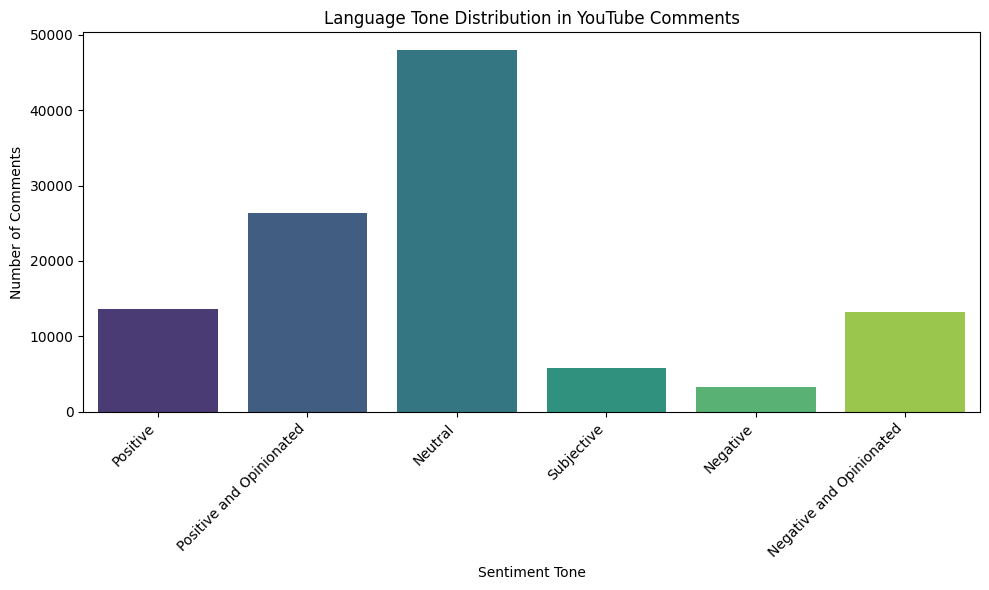

In [ ]:
#Language Tone Distribution in YouTube Comments

# Function to analyze language tone
def analyze_language_tone(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Sentiment (-1 to 1)
    subjectivity = analysis.sentiment.subjectivity  # Opinionated (0 to 1)

    # Enhanced tone categorization
    if polarity > 0.1 and subjectivity > 0.5:
        tone = 'Positive and Opinionated'
    elif polarity > 0.1:
        tone = 'Positive'
    elif polarity < -0.1 and subjectivity > 0.5:
        tone = 'Negative and Opinionated'
    elif polarity < -0.1:
        tone = 'Negative'
    elif subjectivity > 0.5:
        tone = 'Subjective'
    else:
        tone = 'Neutral'

    return polarity, subjectivity, tone

# Apply tone analysis to the 'Comment' column
df[['Polarity', 'Subjectivity', 'Tone']] = df['Comment'].apply(lambda x: pd.Series(analyze_language_tone(x)))

# Display sample results
print(df[['Comment', 'Polarity', 'Subjectivity', 'Tone']].head())

# Visualize tone distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Tone', data=df, palette='viridis', order=['Positive', 'Positive and Opinionated', 'Neutral', 'Subjective', 'Negative', 'Negative and Opinionated'])
plt.title('Language Tone Distribution in YouTube Comments')
plt.xlabel('Sentiment Tone')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Save results to an Excel file
#df.to_excel("youtube_comments_with_tone.xlsx", index=False)
#print("Tone analysis results saved to 'youtube_comments_with_tone.xlsx'.")


                                             Comment Sensitive_Terms Context
0  The best way to deal with scammers is to avoid...              []      {}
1                      You talk too much.gets boring              []      {}
2  Well said, so funny and scary with that scamme...              []      {}
3                        මොහු නිතිය හමුවට පමුණවා ඇත.              []      {}
4  Luckily we have camaras to avoid this hypocrit...              []      {}


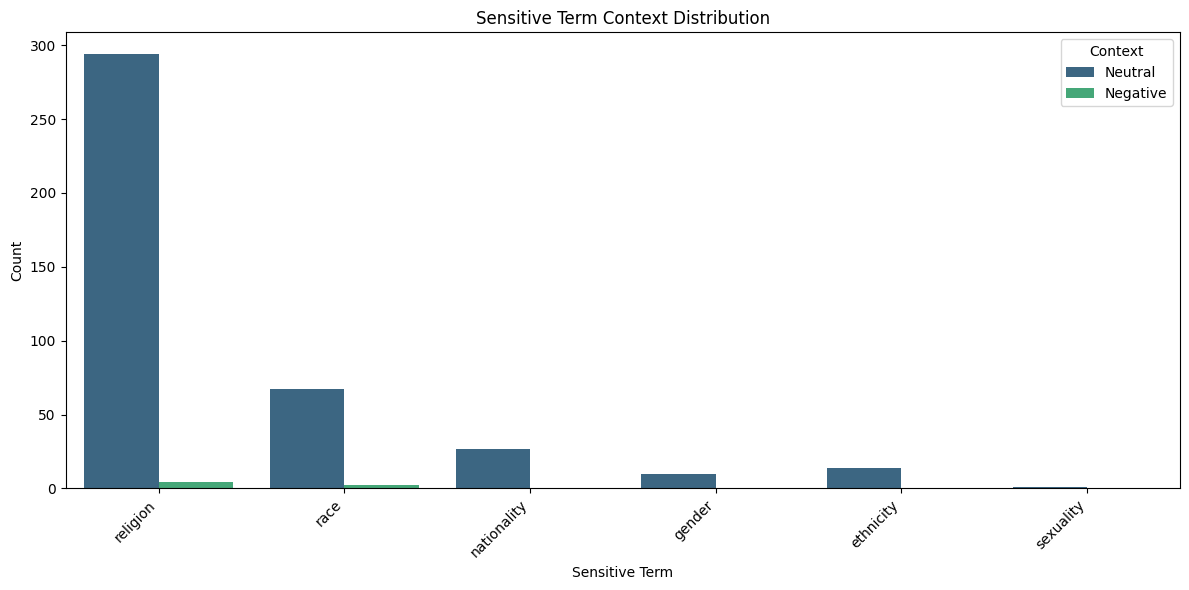

In [ ]:
#Sensitive Term Context Distribution
# Define sensitive terms
sensitive_terms = ["race", "religion", "nationality", "ethnicity", "gender",
                   "sexuality", "disability", "socioeconomic status"]  # Expand as needed

# Define negative words for context analysis
negative_words = ["hate", "discrimination", "prejudice", "bigotry", "stereotype",
                  "bias", "offensive", "racist", "sexist", "homophobic"]

# Function to identify sensitive terms in text
def find_sensitive_terms(text, sensitive_terms):
    words = word_tokenize(text.lower())  # Tokenize and lowercase
    return [term for term in sensitive_terms if term in words]

# Function to analyze the context of sensitive terms
def analyze_context(text, sensitive_terms):
    words = word_tokenize(text.lower())
    term_contexts = {}

    for term in sensitive_terms:
        if term in words:
            index = words.index(term)
            context_window = words[max(0, index - 5): min(len(words), index + 5)]  # 5 words before and after

            # Check if any negative words appear in the context
            if any(word in context_window for word in negative_words):
                term_contexts[term] = "Negative"
            else:
                term_contexts[term] = "Neutral"

    return term_contexts

# Apply functions to dataset
df['Sensitive_Terms'] = df['Comment'].apply(lambda x: find_sensitive_terms(x, sensitive_terms))
df['Context'] = df.apply(lambda row: analyze_context(row['Comment'], row['Sensitive_Terms']), axis=1)

# Extract terms and their contexts for visualization
all_sensitive_terms_found = list(chain.from_iterable(df['Sensitive_Terms']))
all_contexts = list(chain.from_iterable([list(ctx.values()) for ctx in df['Context']]))

# Create DataFrame for visualization
term_context_df = pd.DataFrame({'Term': all_sensitive_terms_found, 'Context': all_contexts})

# Display sample results
print(df[['Comment', 'Sensitive_Terms', 'Context']].head(5))

# Visualization of sensitive terms context
plt.figure(figsize=(12, 6))
sns.countplot(x='Term', hue='Context', data=term_context_df, palette='viridis')
plt.title('Sensitive Term Context Distribution')
plt.xlabel('Sensitive Term')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.tight_layout()
plt.show()

# Save results for review
#df.to_excel("youtube_comments_cultural_analysis.xlsx", index=False)
#print("Cultural sensitivity analysis results saved to 'youtube_comments_cultural_analysis.xlsx'.")


                                             Comment Polarizing_Words  \
0  The best way to deal with scammers is to avoid...               []   
1                      You talk too much.gets boring               []   
2  Well said, so funny and scary with that scamme...               []   
3                        මොහු නිතිය හමුවට පමුණවා ඇත.               []   
4  Luckily we have camaras to avoid this hypocrit...               []   
5  Brother protect your stufs from scamers they s...               []   
6   Who visit srilanka 😂😂you are  such a stupid dale               []   
7  Your annoying, not him...stop talking to him, ...               []   
8                                         😂😂😂😂😂😂😂😂😂😂               []   
9  “Free ice cream”\n“Really hot girls”\n“Retro N...               []   

  Bias_Category  
0       Neutral  
1        Biased  
2        Biased  
3       Neutral  
4        Biased  
5       Neutral  
6        Biased  
7        Biased  
8       Neutral  
9        Biased 

<ipython-input-25-a08204459411>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bias_Category', data=df, palette='coolwarm', order=['Neutral', 'Biased', 'Strongly Biased'])


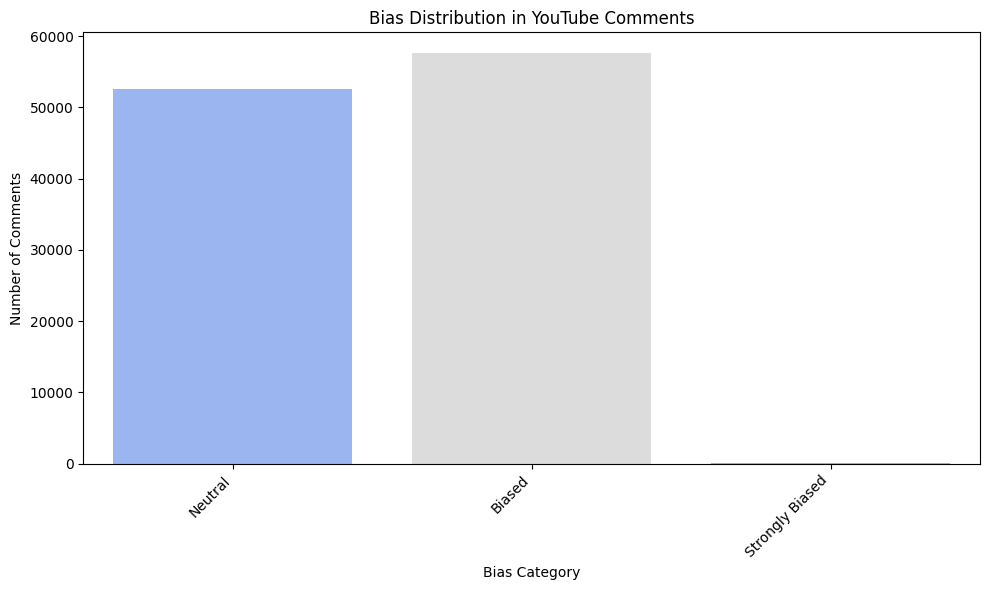

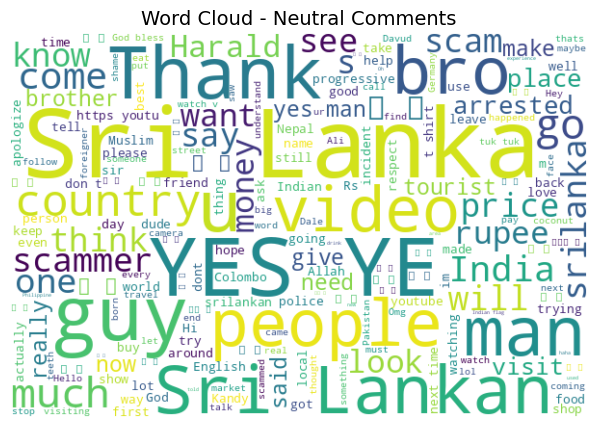

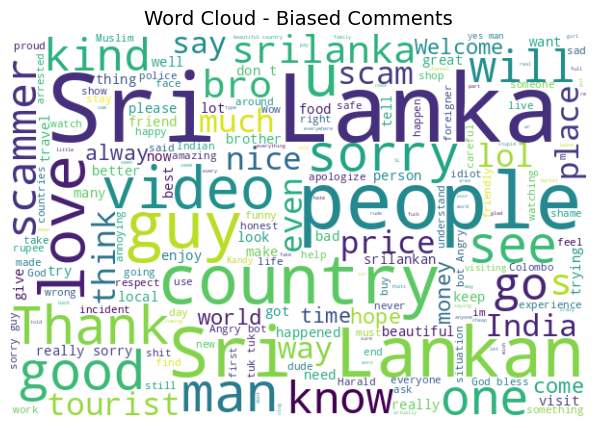

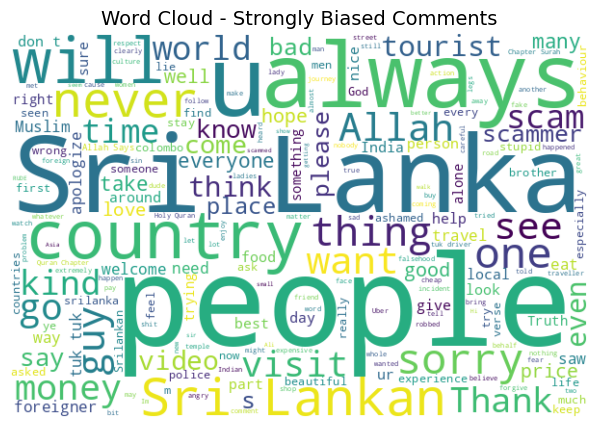

In [ ]:
#Bias Distribution in YouTube Comments
# Define polarizing words (used in stereotypes or extreme opinions)
polarizing_words = ["always", "never", "all", "none", "everyone", "nobody", "completely", "entirely",
                    "totally", "obviously", "clearly", "undeniably"]

# Function to detect polarizing words in a comment
def detect_polarizing_words(text):
    words = word_tokenize(text.lower())
    return [word for word in words if word in polarizing_words]

# Function to determine bias based on subjectivity and polarizing words
def detect_bias(text):
    analysis = TextBlob(text)
    subjectivity = analysis.sentiment.subjectivity  # 0 (fact) → 1 (opinion)
    polarizing_terms = detect_polarizing_words(text)

    if subjectivity > 0.6 and len(polarizing_terms) > 2:
        return "Strongly Biased"
    elif subjectivity > 0.4 or len(polarizing_terms) > 0:
        return "Biased"
    else:
        return "Neutral"

# Apply bias detection to comments
df['Polarizing_Words'] = df['Comment'].apply(detect_polarizing_words)
df['Bias_Category'] = df['Comment'].apply(detect_bias)

# Display sample results
print(df[['Comment', 'Polarizing_Words', 'Bias_Category']].head(10))

# Visualize Bias Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Bias_Category', data=df, palette='coolwarm', order=['Neutral', 'Biased', 'Strongly Biased'])
plt.title('Bias Distribution in YouTube Comments')
plt.xlabel('Bias Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Word Clouds for Each Bias Category
def generate_wordcloud(text_series, title):
    text = " ".join(text_series.dropna().tolist())
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds
for category in ['Neutral', 'Biased', 'Strongly Biased']:
    generate_wordcloud(df[df['Bias_Category'] == category]['Comment'], f"Word Cloud - {category} Comments")

# Bias Analysis by Video Title
if 'Video Title' in df.columns:
    bias_by_video = df.groupby(['Video Title', 'Bias_Category']).size().unstack().fillna(0)

    bias_by_video.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
    plt.title('Bias Trend Across Different Videos')
    plt.xlabel('Video Title')
    plt.ylabel('Number of Comments')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Bias Category")
    plt.tight_layout()
    plt.show()

# Save results for review
#df.to_excel("youtube_comments_bias_analysis.xlsx", index=False)
#print("Bias analysis results saved to 'youtube_comments_bias_analysis.xlsx'.")


<ipython-input-59-45d0178ad229>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='Set2')


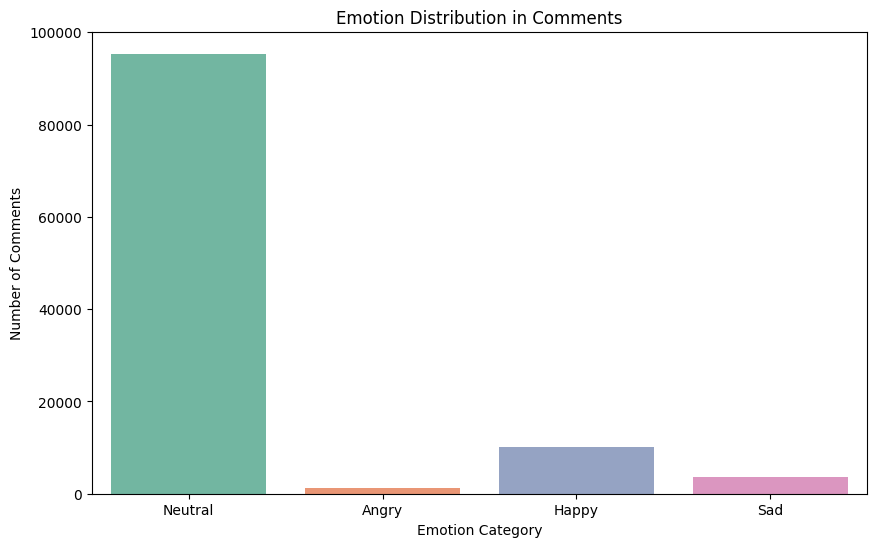

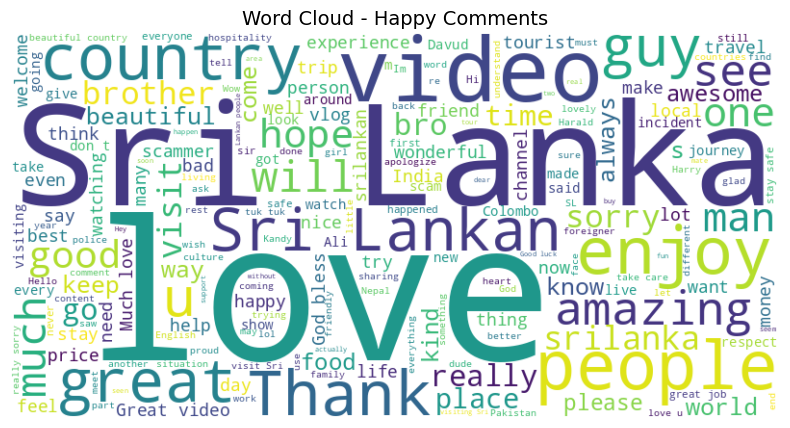

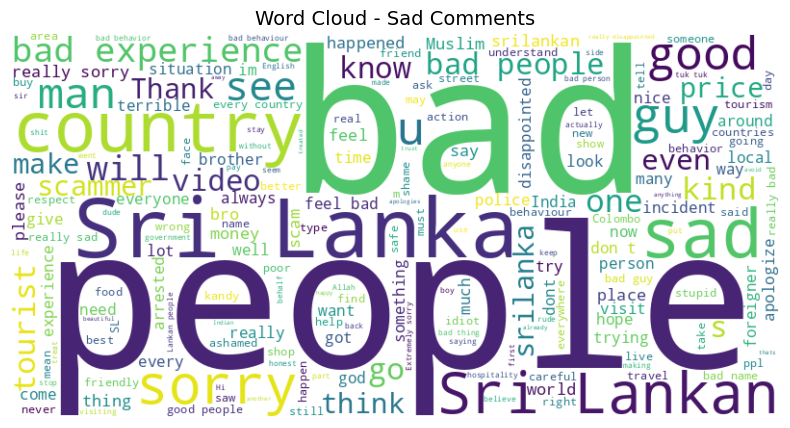

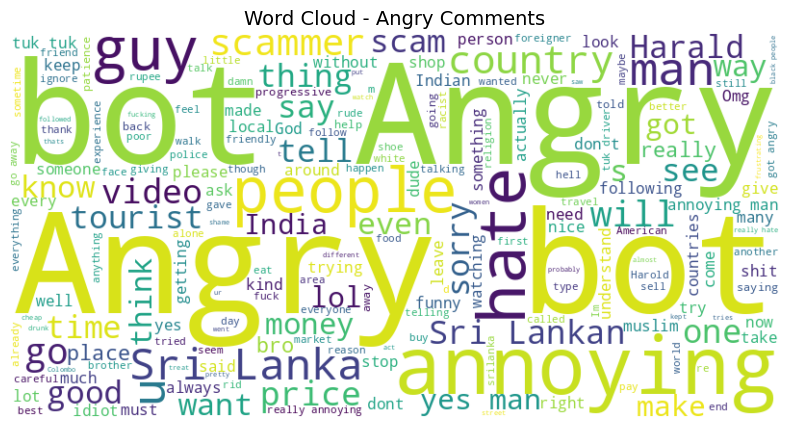

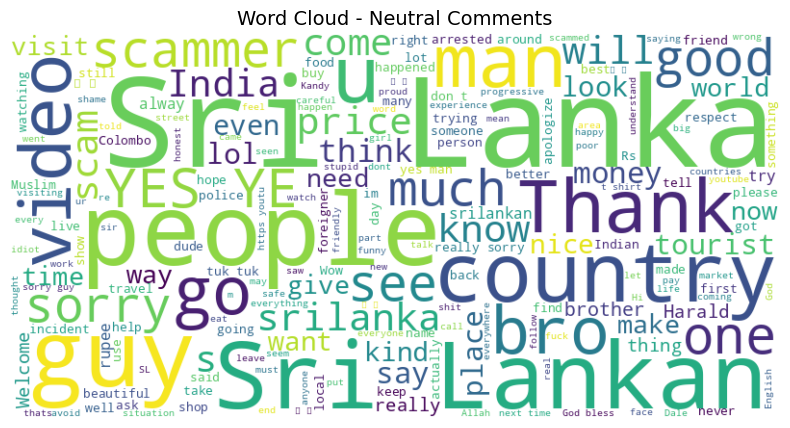

In [ ]:
#Emotion Distribution in Comments

# Define emotion-related keywords
emotion_keywords = {
    "Happy": ["great", "awesome", "love", "fantastic", "enjoy", "exciting", "wonderful", "amazing"],
    "Sad": ["sad", "unhappy", "disappointed", "bad", "terrible", "depressing"],
    "Angry": ["angry", "hate", "annoying", "frustrating", "rage", "furious"],
    "Neutral": []
}

# Function to classify emotion
def detect_emotion(text):
    words = word_tokenize(text.lower())
    for emotion, keywords in emotion_keywords.items():
        if any(word in words for word in keywords):
            return emotion
    return "Neutral"



# Apply bias & emotion detection
df['Emotion'] = df['Comment'].apply(detect_emotion)

# Sentiment Analysis per User
if 'User' in df.columns:
    user_sentiment_shift = df.groupby('User')['Emotion'].nunique()
    frequent_mood_changers = user_sentiment_shift[user_sentiment_shift > 1].index.tolist()
    print("Users with frequent emotion shifts:", frequent_mood_changers)

# Visualizing Emotion Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df, palette='Set2')
plt.title('Emotion Distribution in Comments')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Comments')
plt.show()

# Word Clouds for Each Emotion
def generate_wordcloud(text_series, title):
    text = " ".join(text_series.dropna().tolist())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds
for category in ['Happy', 'Sad', 'Angry', 'Neutral']:
    generate_wordcloud(df[df['Emotion'] == category]['Comment'], f"Word Cloud - {category} Comments")

# Save results
#df.to_excel("youtube_comments_emotion_bias_analysis.xlsx", index=False)
#print("Analysis saved to 'youtube_comments_emotion_bias_analysis.xlsx'.")


In [ ]:
# prompt: need introduction all this  for research paper

Based on the code provided, which performs a comprehensive analysis of YouTube comments including sentiment analysis, topic modeling, language tone, sensitive term context, bias detection, and emotion analysis, here is a possible introduction for a research paper:

## Introduction

The increasing prevalence of online platforms has transformed social interaction and information dissemination. Among these platforms, YouTube stands out as a dominant force in video consumption and a significant hub for public discourse through its comment sections. These comment sections serve as a dynamic repository of user opinions, reactions, and engagement, offering valuable insights into public sentiment, topical discussions, and the overall communication environment.

Analyzing the vast amount of data generated by YouTube comments presents a unique opportunity to understand the nuances of online communication. Beyond simple sentiment analysis, a deeper exploration can reveal underlying biases, the presence of sensitive language, the dominant topics of conversation, and the emotional landscape of the user base. Such analysis is crucial for various applications, including content moderation, understanding public perception of specific videos or topics, identifying trends in online discourse, and potentially improving the quality and safety of online interactions.

This research paper delves into a multifaceted analysis of a dataset of YouTube comments. Employing a combination of natural language processing techniques, including sentiment analysis using both TextBlob and VADER, topic modeling with Latent Dirichlet Allocation (LDA), language tone classification, sensitive term detection and context analysis, bias detection based on subjectivity and polarizing language, and emotion classification, this study aims to provide a comprehensive understanding of the characteristics of these online discussions. By examining these different dimensions, we seek to identify patterns in sentiment distribution, uncover prevalent topics of discussion, analyze the tone and potential biases present in the comments, investigate the context surrounding sensitive terms, and map the emotional responses expressed by users. The findings of this study contribute to the broader understanding of online communication dynamics and provide a framework for analyzing user-generated content on platforms like YouTube.

Attempted to convert 'Published Time' column to datetime.
DataFrame shape after dropping invalid 'Published Time': (110338, 8)


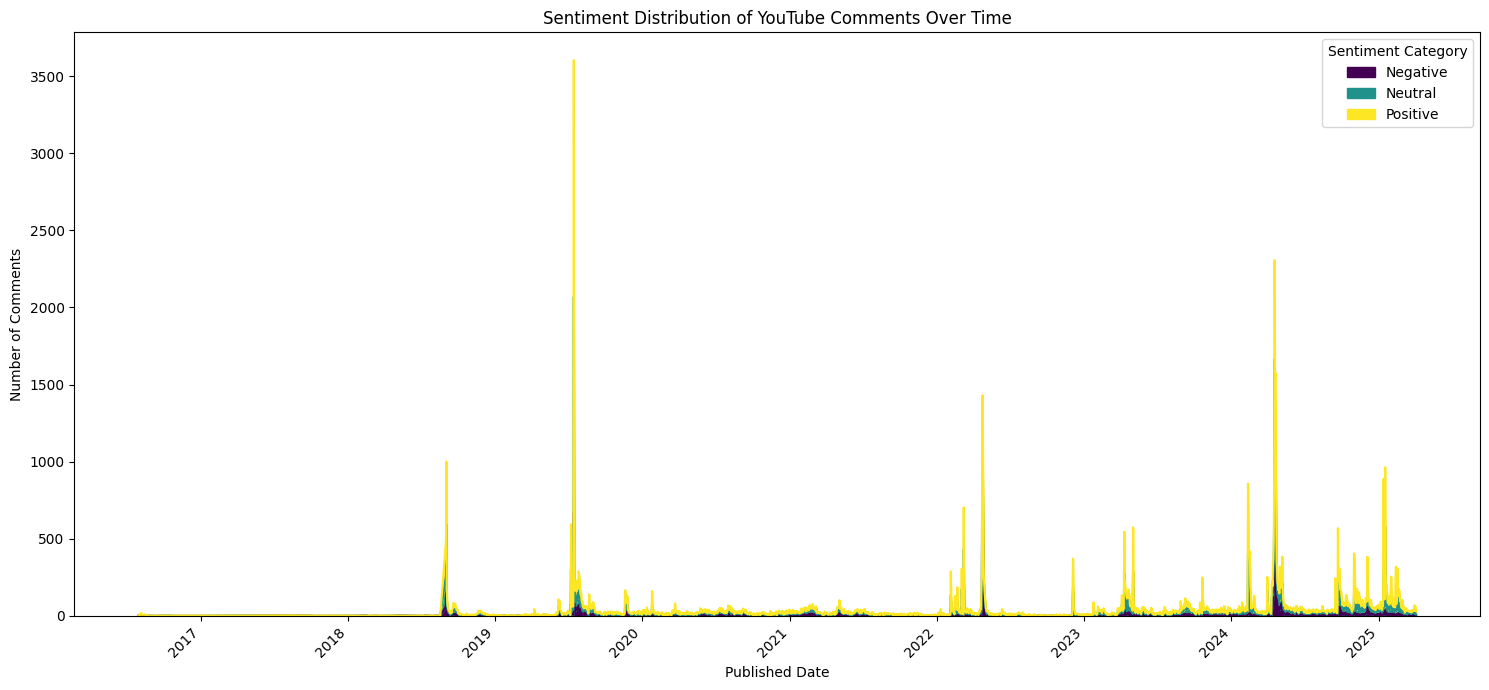

In [ ]:
# prompt: compare Sentiment Distribution of YouTube Comments with published time give suitable plot

# Ensure 'Published Time' column exists and is in a suitable format
if 'Published Time' in df.columns and 'Sentiment_Category' in df.columns:
    # Convert 'Published Time' column to datetime objects, coercing errors
    df['Published Time'] = pd.to_datetime(df['Published Time'], errors='coerce')
    print("Attempted to convert 'Published Time' column to datetime.")
    # Drop rows where datetime conversion failed
    df = df.dropna(subset=['Published Time']).reset_index(drop=True)
    print(f"DataFrame shape after dropping invalid 'Published Time': {df.shape}")

    if not df.empty:
        # Group by 'Published Time' and 'Sentiment_Category' and count the occurrences
        sentiment_time_counts = df.groupby([df['Published Time'].dt.date, 'Sentiment_Category']).size().unstack(fill_value=0)

        # Plot the sentiment distribution over time
        plt.figure(figsize=(15, 7))
        sentiment_time_counts.plot(kind='area', stacked=True, colormap='viridis', ax=plt.gca())

        plt.title('Sentiment Distribution of YouTube Comments Over Time')
        plt.xlabel('Published Date')
        plt.ylabel('Number of Comments')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Sentiment Category')
        plt.tight_layout()
        plt.show()

    else:
        print("DataFrame is empty after dropping rows with invalid 'Published Time'. Skipping sentiment distribution over time plot.")

else:
    print("Required columns ('Published Time' and 'Sentiment_Category') not found in the DataFrame. Skipping sentiment distribution over time plot.")


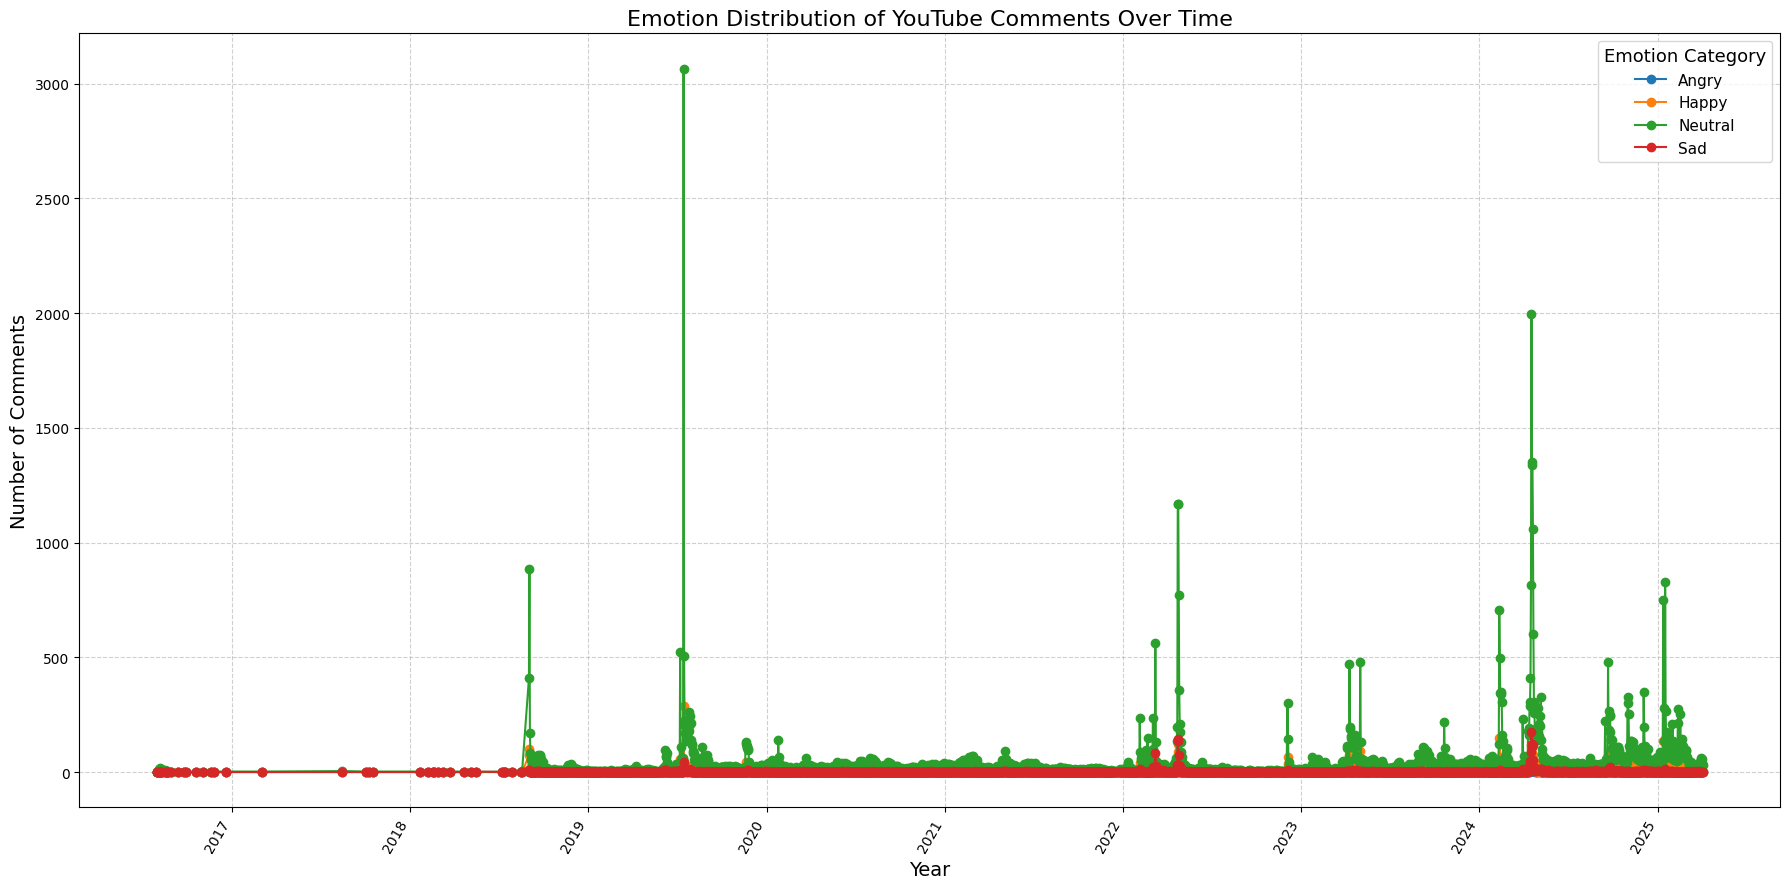

In [ ]:
# prompt: Emotion Distribution in Comments using this bar chart compare with published time give line chart. expand time gap and give clear visualisation

# Group by 'Published Time' (using the date part for daily resolution) and 'Emotion', then count the occurrences
if 'Published Time' in df.columns and 'Emotion' in df.columns:
    df['Published Time'] = pd.to_datetime(df['Published Time'], errors='coerce')
    df = df.dropna(subset=['Published Time']).reset_index(drop=True)

    if not df.empty:
        # Resample to a coarser time frequency if needed for wider gaps, e.g., 'W' for weekly, 'M' for monthly
        # For daily resolution:
        emotion_time_counts = df.groupby([df['Published Time'].dt.date, 'Emotion']).size().unstack(fill_value=0)
        # To resample weekly:
        # emotion_time_counts = df.groupby('Emotion').resample('W', on='Published Time').size().unstack(fill_value=0)
        # To resample monthly:
        # emotion_time_counts = df.groupby('Emotion').resample('M', on='Published Time').size().unstack(fill_value=0)


        # Plot the emotion distribution over time as a line chart
        plt.figure(figsize=(18, 9)) # Increase figure size for better visualization
        emotion_time_counts.plot(kind='line', marker='o', ax=plt.gca())

        plt.title('Emotion Distribution of YouTube Comments Over Time', fontsize=16) # Larger title font
        plt.xlabel('Year', fontsize=14) # Larger xlabel font
        plt.ylabel('Number of Comments', fontsize=14) # Larger ylabel font
        plt.xticks(rotation=60, ha='right') # Rotate xticks more and align
        plt.legend(title='Emotion Category', title_fontsize='13', fontsize='11') # Customize legend font sizes
        plt.grid(True, linestyle='--', alpha=0.6) # Add grid for readability
        plt.tight_layout() # Adjust layout to prevent overlapping labels
        plt.show()
    else:
        print("DataFrame is empty after dropping rows with invalid 'Published Time'. Skipping emotion distribution over time plot.")

else:
    print("Required columns ('Published Time' and 'Emotion') not found in the DataFrame. Skipping emotion distribution over time plot.")

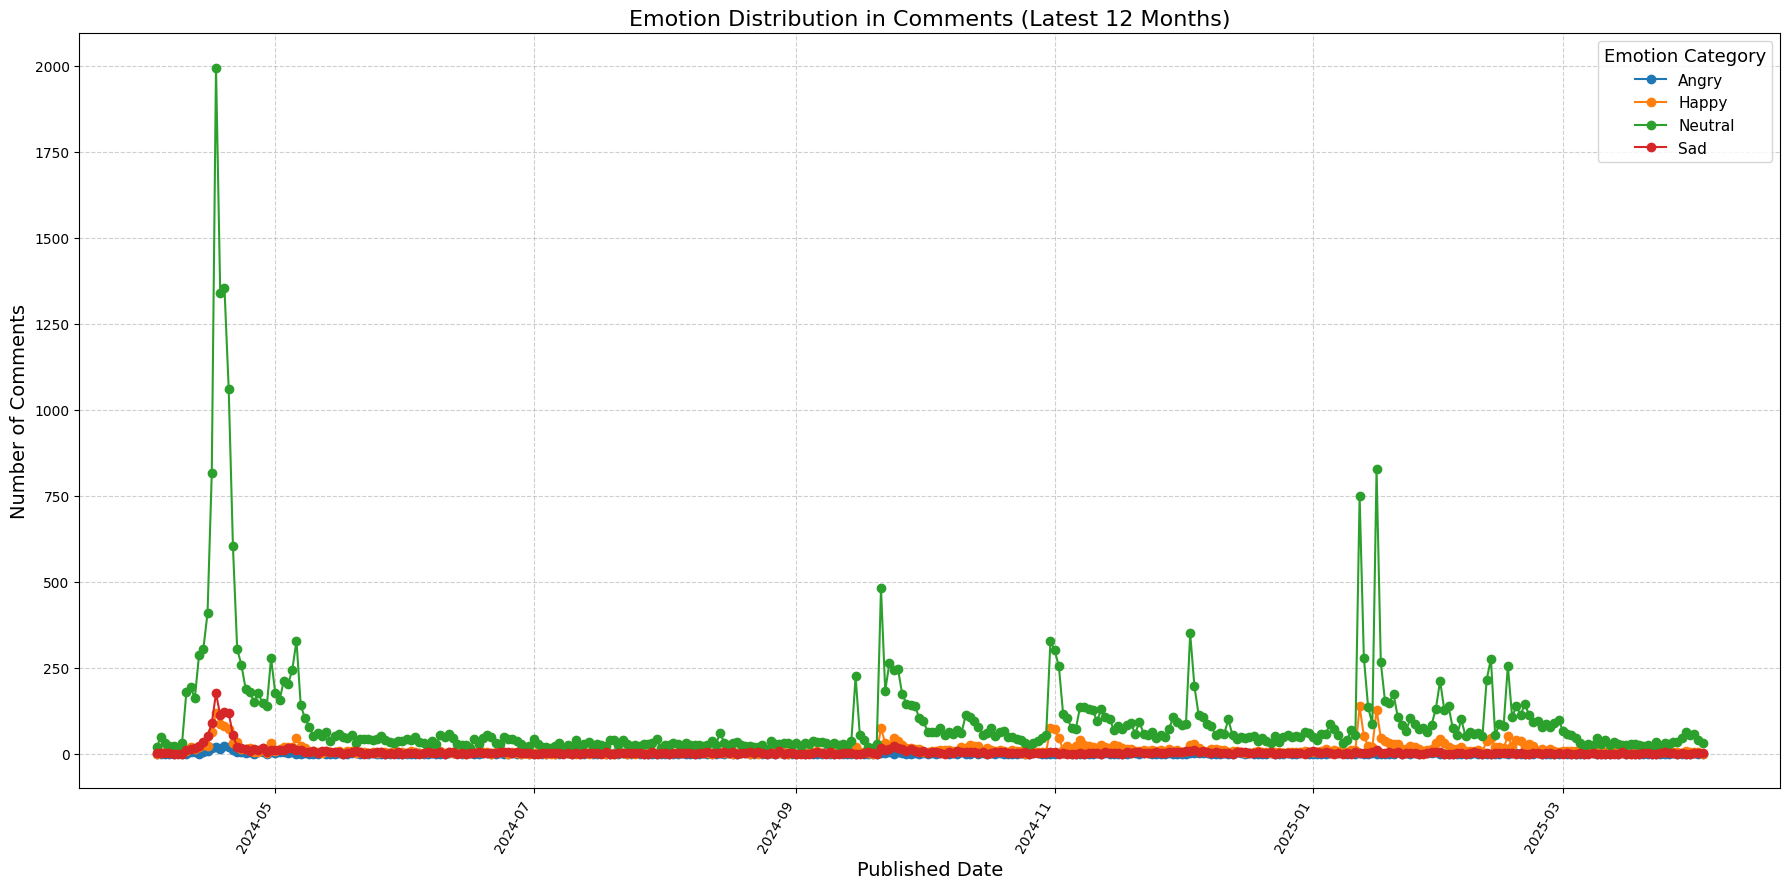

In [ ]:
# prompt: Emotion Distribution in Comments using this bar chart compare with published time(latest 12 months) give line chart

# Filter data for the latest 12 months
if 'Published Time' in df.columns and 'Emotion' in df.columns:
    df['Published Time'] = pd.to_datetime(df['Published Time'], errors='coerce')
    df = df.dropna(subset=['Published Time']).reset_index(drop=True)

    if not df.empty:
        latest_date = df['Published Time'].max()
        twelve_months_ago = latest_date - pd.Timedelta(days=365)
        df_latest_12_months = df[df['Published Time'] >= twelve_months_ago].copy()

        if not df_latest_12_months.empty:
            # Group by date and emotion for the latest 12 months
            emotion_time_counts_latest = df_latest_12_months.groupby([df_latest_12_months['Published Time'].dt.date, 'Emotion']).size().unstack(fill_value=0)

            # Plot the emotion distribution over time for the latest 12 months as a line chart
            plt.figure(figsize=(18, 9)) # Increase figure size for better visualization
            emotion_time_counts_latest.plot(kind='line', marker='o', ax=plt.gca())

            plt.title('Emotion Distribution in Comments (Latest 12 Months)', fontsize=16) # Larger title font
            plt.xlabel('Latest 12 Months', fontsize=14) # Larger xlabel font
            plt.ylabel('Number of Comments', fontsize=14) # Larger ylabel font
            plt.xticks(rotation=60, ha='right') # Rotate xticks more and align
            plt.legend(title='Emotion Category', title_fontsize='13', fontsize='11') # Customize legend font sizes
            plt.grid(True, linestyle='--', alpha=0.6) # Add grid for readability
            plt.tight_layout() # Adjust layout to prevent overlapping labels
            plt.show()
        else:
            print("No data available in the latest 12 months for plotting emotion distribution over time.")
    else:
        print("DataFrame is empty after dropping rows with invalid 'Published Time'. Skipping emotion distribution over time plot.")

else:
    print("Required columns ('Published Time' and 'Emotion') not found in the DataFrame. Skipping emotion distribution over time plot.")


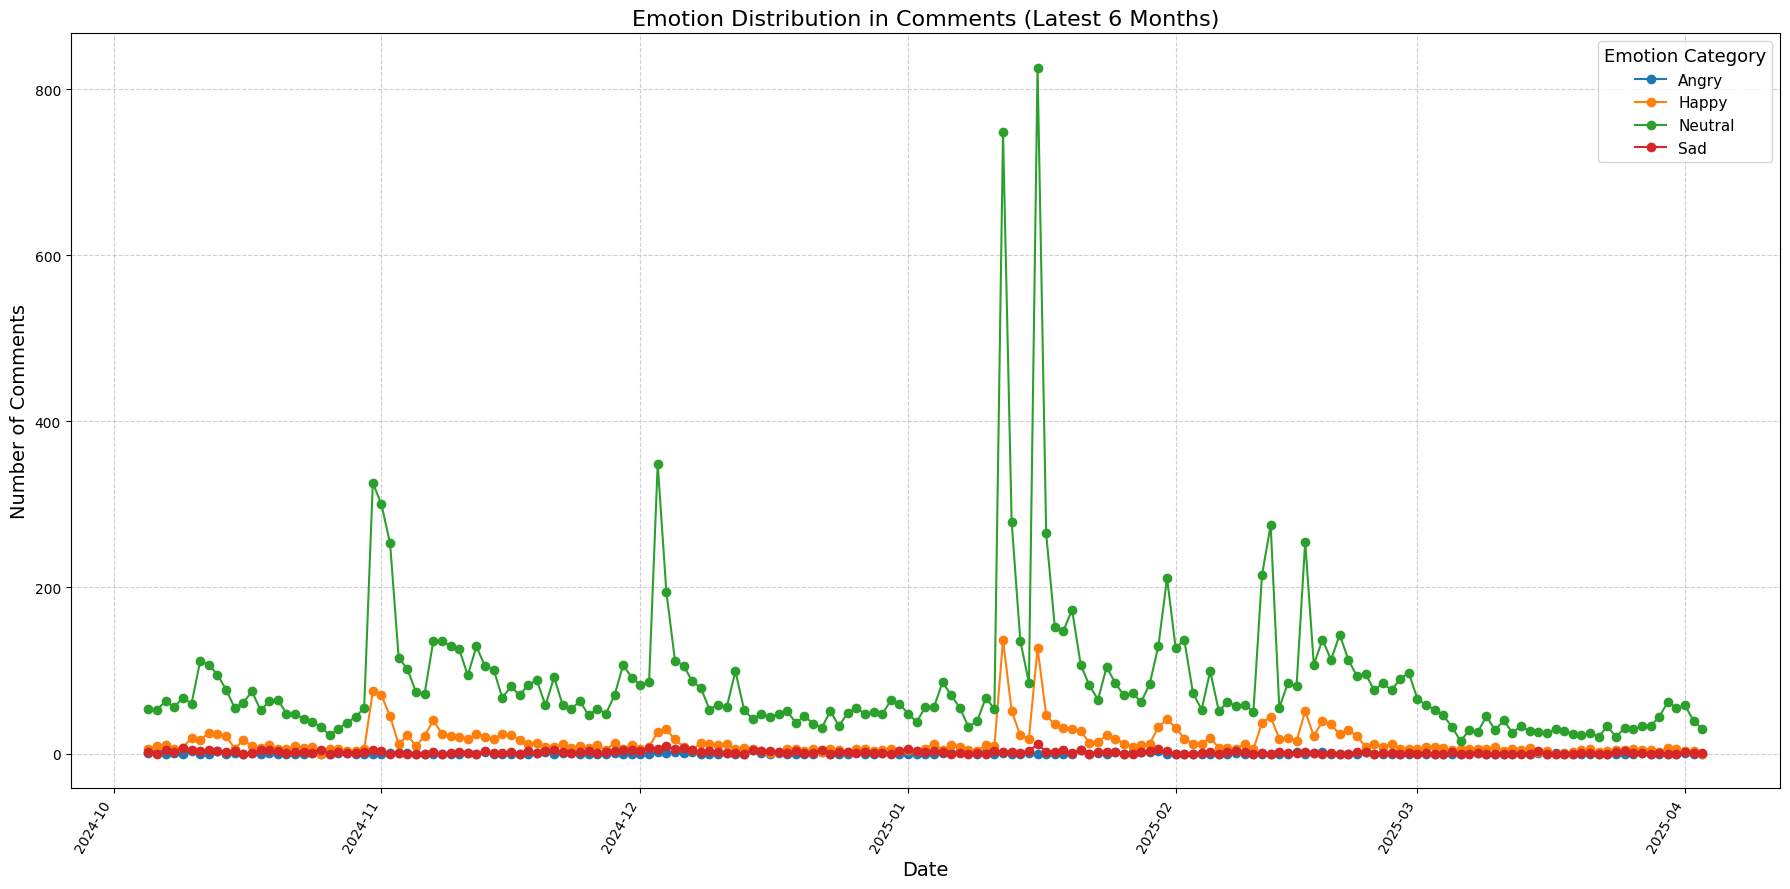

In [ ]:
# prompt: Emotion Distribution in Comments using this bar chart compare with published time (Latest 6 months)give line chart

# Filter data for the latest 6 months
if 'Published Time' in df.columns and 'Emotion' in df.columns:
    df['Published Time'] = pd.to_datetime(df['Published Time'], errors='coerce')
    df = df.dropna(subset=['Published Time']).reset_index(drop=True)

    if not df.empty:
        latest_date = df['Published Time'].max()
        six_months_ago = latest_date - pd.Timedelta(days=180) # Approximately 6 months
        df_latest_6_months = df[df['Published Time'] >= six_months_ago].copy()

        if not df_latest_6_months.empty:
            # Group by date and emotion for the latest 6 months
            emotion_time_counts_latest_6_months = df_latest_6_months.groupby([df_latest_6_months['Published Time'].dt.date, 'Emotion']).size().unstack(fill_value=0)

            # Plot the emotion distribution over time for the latest 6 months as a line chart
            plt.figure(figsize=(18, 9)) # Increase figure size for better visualization
            emotion_time_counts_latest_6_months.plot(kind='line', marker='o', ax=plt.gca())

            plt.title('Emotion Distribution in Comments (Latest 6 Months)', fontsize=16) # Larger title font
            plt.xlabel('Date', fontsize=14) # Larger xlabel font
            plt.ylabel('Number of Comments', fontsize=14) # Larger ylabel font
            plt.xticks(rotation=60, ha='right') # Rotate xticks more and align
            plt.legend(title='Emotion Category', title_fontsize='13', fontsize='11') # Customize legend font sizes
            plt.grid(True, linestyle='--', alpha=0.6) # Add grid for readability
            plt.tight_layout() # Adjust layout to prevent overlapping labels
            plt.show()
        else:
            print("No data available in the latest 6 months for plotting emotion distribution over time.")
    else:
        print("DataFrame is empty after dropping rows with invalid 'Published Time'. Skipping emotion distribution over time plot.")

else:
    print("Required columns ('Published Time' and 'Emotion') not found in the DataFrame. Skipping emotion distribution over time plot.")